In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
#matplotlib.style.use('ggplot')

* Pandas has two important data strucures **Series** and **DataFrame**

### Series

**Series** is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.)

```python
>>> s = pd.Series(data, index=index)
```

<img src="fig_pd_series1.png" alt="Pandas Series Example" height="250" width="250" align = "left">

In [453]:
person_height_ft = pd.Series([5.5,5.2,5.8,6.1,4.8],name='height',
                index = ['person_a','person_b','person_c','person_d','person_e'],dtype=np.float64)
person_height_ft

person_a    5.5
person_b    5.2
person_c    5.8
person_d    6.1
person_e    4.8
Name: height, dtype: float64

In [454]:
person_height_ft.values

array([ 5.5,  5.2,  5.8,  6.1,  4.8])

In [455]:
person_height_ft.index

Index([u'person_a', u'person_b', u'person_c', u'person_d', u'person_e'], dtype='object')

* A Series is like a fixed-size dict in that you can get and set values by index label

In [456]:
person_height_ft['person_c']

5.7999999999999998

* You can also use the index position to get and set the values

In [457]:
person_height_ft[3]

6.0999999999999996

In [458]:
person_height_ft[0:3]

person_a    5.5
person_b    5.2
person_c    5.8
Name: height, dtype: float64

####  Vectorized operations and label alignment with Series

In [464]:
person_height_mtr = (12* 2.54) * person_height_ft/100
person_height_mtr

person_a    1.67640
person_b    1.58496
person_c    1.76784
person_d    1.85928
person_e    1.46304
Name: height, dtype: float64

In [471]:
# please note the index which is not same as height
person_weight_kg = pd.Series([70,55,73,68,66],name='weight',
                index = ['person_b','person_d','person_e','person_c','person_a'],dtype=np.float64)
person_weight_kg

person_b    70
person_d    55
person_e    73
person_c    68
person_a    66
Name: weight, dtype: float64

In [473]:
#Let's calculate BMI
bmi = person_weight_kg/person_height_mtr**2
bmi

person_a    23.484895
person_b    27.865153
person_c    21.758202
person_d    15.910107
person_e    34.104404
dtype: float64

In [469]:
#BMI of person_c
68/(1.76784*1.76784)

21.75820179358683

### DataFrame

* DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object. 

<img src="fig_pd_data_frame.png" alt="Pandas DataFrame Example" height="400" width="400" align = "left">

In [536]:
index = ['person_a','person_b','person_c','person_d','person_e']
df_person = pd.DataFrame({'height':[5.5,5.2,5.8,6.1,4.8],'weight':[66,70,68,55,73],
                   'gender':['male','male','female','male','female']}, index=index)

In [491]:
df_person.describe()

,height,weight
count,5.000000,5.0000
mean,5.480000,66.4000
std,0.506952,6.8775
min,4.800000,55.0000
25%,5.200000,66.0000
50%,5.500000,68.0000
75%,5.800000,70.0000
max,6.100000,73.0000


In [509]:
print df_person.ndim
print df_person.shape
print df_person.dtypes
print df_person.columns
print df_person.index
print len(df_person)

2
(5, 3)
gender     object
height    float64
weight      int64
dtype: object
Index([u'gender', u'height', u'weight'], dtype='object')
Index([u'person_a', u'person_b', u'person_c', u'person_d', u'person_e'], dtype='object')
5


In [502]:
df_person.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, person_a to person_e
Data columns (total 3 columns):
gender    5 non-null object
height    5 non-null float64
weight    5 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 160.0+ bytes


In [503]:
df_person.reset_index()

,index,gender,height,weight
0,person_a,male,5.5,66
1,person_b,male,5.2,70
2,person_c,female,5.8,68
3,person_d,male,6.1,55
4,person_e,female,4.8,73


In [504]:
df_person.reset_index().set_index('gender')

,index,height,weight
gender,,,
male,person_a,5.5,66
male,person_b,5.2,70
female,person_c,5.8,68
male,person_d,6.1,55
female,person_e,4.8,73


In [508]:
another_index = ['a','b','c','d','e']
df1 = df_person.reset_index()
df1.index = another_index
df1

,index,gender,height,weight
a,person_a,male,5.5,66
b,person_b,male,5.2,70
c,person_c,female,5.8,68
d,person_d,male,6.1,55
e,person_e,female,4.8,73


### Accessing Data

In [539]:
# Accessing the column data
height = df_person['height']
height

person_a    5.5
person_b    5.2
person_c    5.8
person_d    6.1
person_e    4.8
Name: height, dtype: float64

In [521]:
type(height)

pandas.core.series.Series

In [544]:
# Accessing multiple columns
df_person[['height','weight']]

,height,weight
person_a,5.5,66
person_b,5.2,70
person_c,5.8,68
person_d,6.1,55
person_e,4.8,73


In [540]:
# Accessinng one individual cell
df_person['height']['person_a']

5.5

In [541]:
# Accessing rows by index keys
df_person.loc['person_a']

gender    male
height     5.5
weight      66
Name: person_a, dtype: object

In [546]:
# Accessing multiple rows using range
df_person['person_a':'person_c']

,gender,height,weight
person_a,male,5.5,66
person_b,male,5.2,70
person_c,female,5.8,68


In [553]:
# Accessing using index position
print df_person.iloc[0]
print "--------------"
print df_person.iloc[0,2]

gender    male
height     5.5
weight      66
Name: person_a, dtype: object
--------------
66


In [557]:
print df_person.ix[0]
print df_person.ix['person_b']

gender    male
height     5.5
weight      66
Name: person_a, dtype: object
gender    male
height     5.2
weight      70
Name: person_b, dtype: object


In [526]:
# Boolean indexinng
# all persons with height > 5.2 feet
df_person[df_person.height > 5.2]

,gender,height,weight
person_a,male,5.5,66
person_c,female,5.8,68
person_d,male,6.1,55


In [527]:
# Boolean indexinng
# all persons with height > 5.2 feet and weight > 60kgs
df_person[(df_person.height > 5.2) & (df_person.weight > 60)]

,gender,height,weight
person_a,male,5.5,66
person_c,female,5.8,68


In [528]:
df_person

,gender,height,weight
person_a,male,5.5,66
person_b,male,5.2,70
person_c,female,5.8,68
person_d,male,6.1,55
person_e,female,4.8,73


In [560]:
# Let's add new column "age" to the DataFrame
df_person['age'] = pd.Series([30,28,26,19,42], index=index)

In [559]:
df_person

,gender,height,weight,age
person_a,male,5.5,66,30
person_b,male,5.2,70,28
person_c,female,5.8,68,26
person_d,male,6.1,55,19
person_e,female,4.8,73,42


In [561]:
# Find perons with age > 28

In [562]:
# Find females with age > 28

In [567]:
# Find max aged person
df_person[df_person.age==df_person.age.max()]

,gender,height,weight,age
person_e,female,4.8,73,42


In [568]:
# Find max aged male person

In [569]:
# Find all persons having height > average height of the group

### Handling missing values

In [598]:
# Let's introduce few NaN values 
df_person.ix['person_a','age'] = np.NaN
df_person.ix[2,2] = np.NaN
df_person.ix['person_e',1] = np.NaN
df_person.ix['person_f'] = np.NaN
df_person['married'] = np.NaN
#= np.NaN

In [599]:
df_person

,gender,height,weight,age,married
person_a,male,5.5,66,NaN,NaN
person_b,male,5.2,70,28,NaN
person_c,female,5.8,NaN,26,NaN
person_d,male,6.1,55,19,NaN
person_e,female,NaN,73,42,NaN
person_f,NaN,NaN,NaN,NaN,NaN


In [600]:
# how takes 'all' or 'any'
# dropping all of the rows if all of the values are np.NaN
df_person.dropna(how='all')

,gender,height,weight,age,married
person_a,male,5.5,66,NaN,NaN
person_b,male,5.2,70,28,NaN
person_c,female,5.8,NaN,26,NaN
person_d,male,6.1,55,19,NaN
person_e,female,NaN,73,42,NaN


In [601]:
# how takes 'all' or 'any'
# dropping all of the columns if all of the values are np.NaN
df_person.dropna(axis=1,how='all')

,gender,height,weight,age
person_a,male,5.5,66,NaN
person_b,male,5.2,70,28
person_c,female,5.8,NaN,26
person_d,male,6.1,55,19
person_e,female,NaN,73,42
person_f,NaN,NaN,NaN,NaN


In [603]:
# Filling all of the NaN values with zero
df_person.fillna(0)

,gender,height,weight,age,married
person_a,male,5.5,66,0,0
person_b,male,5.2,70,28,0
person_c,female,5.8,0,26,0
person_d,male,6.1,55,19,0
person_e,female,0.0,73,42,0
person_f,0,0.0,0,0,0


In [610]:
# replace NaN weight with average weight of the group
#df_person.weight.mean()
df_person['weight'].fillna(df_person.weight.mean())

person_a    66
person_b    70
person_c    66
person_d    55
person_e    73
person_f    66
Name: weight, dtype: float64

In [611]:
df_person.fillna(method='ffill')

,gender,height,weight,age,married
person_a,male,5.5,66,NaN,NaN
person_b,male,5.2,70,28,NaN
person_c,female,5.8,70,26,NaN
person_d,male,6.1,55,19,NaN
person_e,female,6.1,73,42,NaN
person_f,female,6.1,73,42,NaN


In [612]:
df_person.fillna(method='bfill')

,gender,height,weight,age,married
person_a,male,5.5,66,28,NaN
person_b,male,5.2,70,28,NaN
person_c,female,5.8,55,26,NaN
person_d,male,6.1,55,19,NaN
person_e,female,NaN,73,42,NaN
person_f,NaN,NaN,NaN,NaN,NaN


In [613]:
df_person[df_person['weight'].notnull()]

,gender,height,weight,age,married
person_a,male,5.5,66,NaN,NaN
person_b,male,5.2,70,28,NaN
person_d,male,6.1,55,19,NaN
person_e,female,NaN,73,42,NaN


In [615]:
df_person[df_person.notnull()['age']]

,gender,height,weight,age,married
person_b,male,5.2,70,28,NaN
person_c,female,5.8,NaN,26,NaN
person_d,male,6.1,55,19,NaN
person_e,female,NaN,73,42,NaN


In [633]:
df_person = df_person.dropna(how='all')
df_person = df_person.dropna(how='all',axis=1)
df_person

,gender,height,weight,age
person_a,male,5.5,66,NaN
person_b,male,5.2,70,28
person_c,female,5.8,70,26
person_d,male,6.1,55,19
person_e,female,6.1,73,42


In [634]:
df_person = df_person.fillna(method='ffill')
df_person

,gender,height,weight,age
person_a,male,5.5,66,NaN
person_b,male,5.2,70,28
person_c,female,5.8,70,26
person_d,male,6.1,55,19
person_e,female,6.1,73,42


In [635]:
df_person['bmi'] = df_person['weight']/(((12* 2.54) * df_person['height']/100)**2)
df_person

,gender,height,weight,age,bmi
person_a,male,5.5,66,NaN,23.484895
person_b,male,5.2,70,28,27.865153
person_c,female,5.8,70,26,22.398149
person_d,male,6.1,55,19,15.910107
person_e,female,6.1,73,42,21.117051


### GroupBy function

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure

<img src="fig_pd_groupby.jpg" alt="Pandas GroupBy" height="350" width="350" align="left">

In [642]:
df_person

,gender,height,weight,age,bmi
person_a,male,5.5,66,NaN,23.484895
person_b,male,5.2,70,28,27.865153
person_c,female,5.8,70,26,22.398149
person_d,male,6.1,55,19,15.910107
person_e,female,6.1,73,42,21.117051


In [647]:
df_person_grp = df_person.groupby('gender')
print type(df_person_grp)

<class 'pandas.core.groupby.DataFrameGroupBy'>


In [648]:
for group,data in df_person_grp:
    print group, data
    print "--------------------------------"

female           gender  height  weight  age        bmi
person_c  female     5.8      70   26  22.398149
person_e  female     6.1      73   42  21.117051
--------------------------------
male          gender  height  weight  age        bmi
person_a   male     5.5      66  NaN  23.484895
person_b   male     5.2      70   28  27.865153
person_d   male     6.1      55   19  15.910107
--------------------------------


In [698]:
df_person_grp.mean()

,height,weight,age,bmi
gender,,,,
female,5.95,71.500000,34.0,21.757600
male,5.60,63.666667,23.5,22.420052


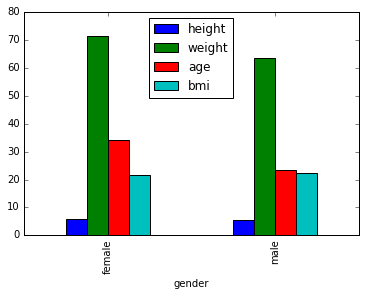

In [701]:
df_person_grp.mean().plot(kind='bar')

### Working with Text Data

In [719]:
df_person.apply(lambda x: x['gender'].upper()[0], axis=1)

person_a    M
person_b    M
person_c    F
person_d    M
person_e    F
dtype: object

In [726]:
df_person[['age','weight','height']].apply(lambda x: x.dtype)

age       float64
weight    float64
height    float64
dtype: object

In [722]:
df_person.mean()

height     5.740000
weight    66.800000
age       28.750000
bmi       22.155071
dtype: float64

In [657]:
df_person['gender'].str.upaer().str[0]

person_a    M
person_b    M
person_c    F
person_d    M
person_e    F
Name: gender, dtype: object

### Working with Dates and TimeSeries Data

In [674]:
# settig seed ?
np.random.seed(5)
price = pd.Series(np.random.randint(100,high=150,size=150),
                  index=pd.date_range('2000-1-1', periods=150, freq='B'),name='col1')

In [675]:
price.head()

2000-01-03    135
2000-01-04    114
2000-01-05    147
2000-01-06    138
2000-01-07    116
Freq: B, Name: col1, dtype: int64

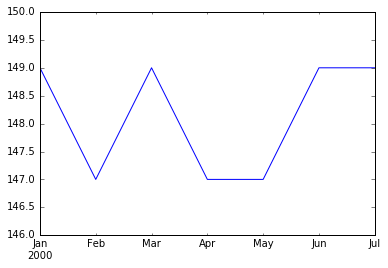

In [688]:
price.groupby(pd.TimeGrouper('1M')).max().plot(ylim=(146,150))

In [691]:
np.random.seed(5)
price1 = pd.Series(np.random.randint(200,high=250,size=500),
                   index=pd.date_range('2000-1-1', periods=500, freq='D'),name='col2')
#all_days = pd.date_range('2000-1-1', periods=500, freq='D')

In [692]:
df_time = pd.DataFrame({'col1':price,'col2':price1})

In [693]:
df_time.head()

,col1,col2
2000-01-01,NaN,235
2000-01-02,NaN,214
2000-01-03,135,247
2000-01-04,114,238
2000-01-05,147,216


In [694]:
len(df_time)

500

In [695]:
df.dtypes

a      float64
b      float64
c      float64
d      float64
age    float64
dtype: object

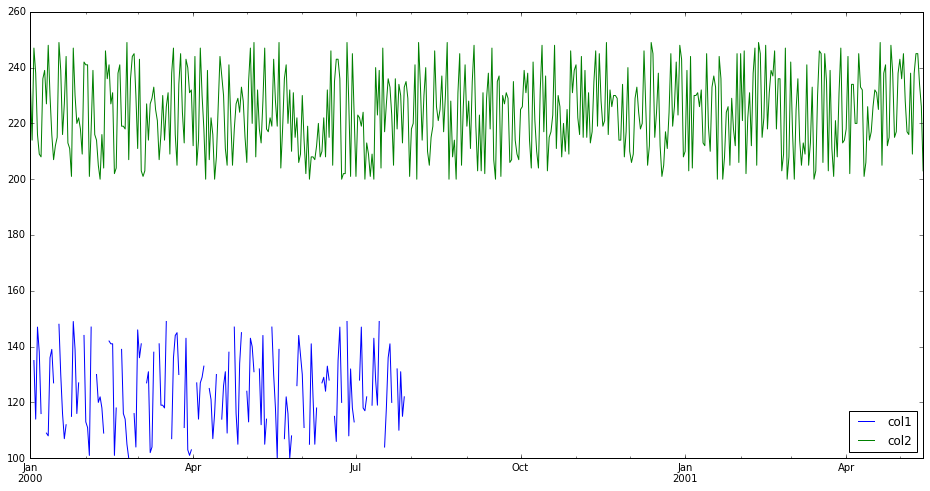

In [696]:
df_time.plot(figsize=(16,8))

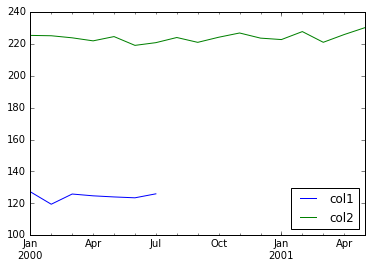

In [697]:
df_time.groupby(pd.TimeGrouper('1M')).mean().plot()

In [352]:
pd.Categorical?

In [353]:
pd.CategoricalIndex?

In [354]:
df

,a,b,c,d,label
m1,10,20,30,NaN,l1
m2,15,NaN,35,45,l1
m3,5,10,15,20,l2
m4,2,6,8,12,l2


In [365]:
x = pd.Categorical(df['label'],ordered=True)

In [366]:
cat = pd.Series(df['label'], dtype=x)

In [367]:
cat

m1    l1
m2    l1
m3    l2
m4    l2
Name: label, dtype: category
Categories (2, object): [l1, l2]

In [369]:
pd.DateOffset?

In [370]:
x = pd.Series([1,2,3,4,5])

In [374]:
pd.merge?

In [376]:
pd.concat?

In [377]:
pd.Grouper?

In [378]:
pd.TimeGrouper?

In [380]:
pd.Timedelta?

In [403]:
x1 = pd.Timestamp('2016-12-10 14:01:03')
x2 = pd.Timestamp('2016-12-10 14:05:42')
a = (x2-x1).value/(60*10E8)
a

4.65

In [404]:
a = x2-x1

In [413]:
a.view

<bound method Timedelta.view of Timedelta('0 days 00:04:39')>

In [414]:
pd.Timestamp?

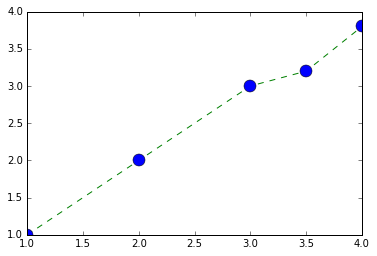

In [426]:
plt.plot([1,2,3,3.5,4.0],[1,2,3,3.2,3.8], color='green', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=12)

In [429]:
plt?

In [430]:
plt.plot.box?

Object `plt.plot.box` not found.


In [431]:
import matplotlib